<a href="https://colab.research.google.com/github/Cezari0o/Article-Citation-Model/blob/main/a5/A5_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 5
Feita por Gabriel Cesário Silva Martins - 180100912

# Treinamento do modelo

Código do treinamento, feito pelo professor, de uma rede profunda multicamadas para classificação de sentimentos em tweets. Disponível neste [link](https://github.com/viniciusrpb/cic0269_natural_language_processing/blob/main/cap03_3_deep_multilayer_perceptron.ipynb)

In [1]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [4]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [5]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [6]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [7]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [8]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [9]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [10]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [11]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [12]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [13]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [14]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [15]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0264 - accuracy: 0.4736 - val_loss: 1.0601 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0052 - accuracy: 0.4736 - val_loss: 1.0613 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 6ms/step - loss: 1.0031 - accuracy: 0.4736 - val_loss: 1.0600 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0011 - accuracy: 0.4736 - val_loss: 1.0582 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9988 - accuracy: 0.4736 - val_loss: 1.0566 - val_accuracy: 0.4468
Epoch 6/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9965 - accuracy: 0.4736 - val_loss: 1.0537 - val_accuracy: 0.4468
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9939 - accuracy: 0.4736 - val_loss: 1.0544 - val_accuracy: 0.4468
Epoch 

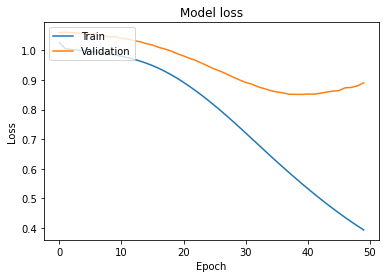

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

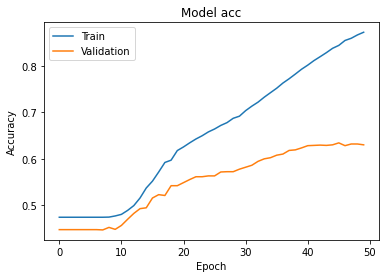

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [19]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.6456


In [20]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.08490456, 0.22290765, 0.6921878 ],
       [0.0358107 , 0.01047515, 0.95371413],
       [0.03790961, 0.90794843, 0.05414195],
       ...,
       [0.12859167, 0.5960742 , 0.2753341 ],
       [0.29461738, 0.12678781, 0.57859486],
       [0.14456524, 0.59316665, 0.26226807]], dtype=float32)

In [21]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [22]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

# Medidas de Precisão
## Matriz de confusão

Construindo a matriz de confusão

In [23]:
matrix = []
for i in range(3):
  matrix.append([0, 0, 0])
matrix

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [24]:
# Contando ocorrencias as ocorrencias
for idx, i in enumerate(y_test_int):
  matrix[i][y_pred[idx]] += 1

# Mostrando a matriz
for l in range(3):
  print(matrix[l])

[104, 337, 118]
[20, 1243, 250]
[29, 503, 943]


## Acurácia
Medindo a acurácia do modelo

In [25]:
acc = 0
for i in range(3):
  acc += matrix[i][i] / len(y_pred)
acc

0.6456160135325628

## Precisão
Precisão das três classes presentes no dataset

In [26]:
# Precisao
prec = 3 * [0]
for class_idx in range(3):
  d = 0
  for i in range(3):
    d += matrix[i][class_idx]
  prec[class_idx] = matrix[class_idx][class_idx] / d
  print(f"Precisão da classe {class_idx} : {prec[class_idx]:.2f}")

Precisão da classe 0 : 0.68
Precisão da classe 1 : 0.60
Precisão da classe 2 : 0.72


## Revocação
Revocação das classes do dataset

In [27]:
# Revocacao
rev = 3 * [0]
for class_idx in range(3):
  d = 0
  for i in range(3):
    d += matrix[class_idx][i]
  rev[class_idx] = matrix[class_idx][class_idx] / d
  print(f"Revocacao da classe {class_idx} : {rev[class_idx]:.2f}")

Revocacao da classe 0 : 0.19
Revocacao da classe 1 : 0.82
Revocacao da classe 2 : 0.64


## F1 Score
Obtendo f1-score de todas as classes

In [28]:
# F1 score

f1_score = 3 * [0]
for i in range(3):
  f1_score[i] = 2 * (prec[i] * rev[i]) / (prec[i] + rev[i])
  print(f'F1 score (classe {i}) : {f1_score[i]:.2f}')

F1 score (classe 0) : 0.29
F1 score (classe 1) : 0.69
F1 score (classe 2) : 0.68


# Conclusão
Finalmente, para fins de comparação, usamos a função `classification_report`, presente no `scikit-learn`, para processar as medidas acima. Como é mostrado, as medidas são equivalentes as mostradas abaixo.

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_int, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.19      0.29       559
           1       0.60      0.82      0.69      1513
           2       0.72      0.64      0.68      1475

    accuracy                           0.65      3547
   macro avg       0.67      0.55      0.55      3547
weighted avg       0.66      0.65      0.62      3547

